In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rock = pd.read_csv('../Datasets/rock_density_xray.csv')

In [3]:
rock.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rebound Signal Strength nHz', ylabel='Rock Density kg/m3'>

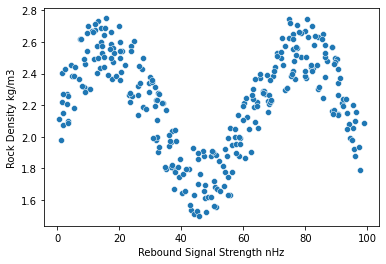

In [16]:
sns.scatterplot(rock['Rebound Signal Strength nHz'],rock['Rock Density kg/m3'])

In [25]:
X = rock['Rebound Signal Strength nHz'].values.reshape(-1,1)
y = rock['Rock Density kg/m3'].values.reshape(-1,1)

In [26]:
## #train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=.33)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
reg_model = LinearRegression()

In [39]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = reg_model.predict(X_test)

## # LinearRegression Model 

In [97]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
mean_squared_error(y_test,y_pred)

0.08292277538892308

In [43]:
mean_absolute_error(y_test,y_pred)

0.23290620575802648

In [47]:
#fited line
single_range = np.arange(1,100).reshape(-1,1)

In [48]:
pred_single = reg_model.predict(single_range)

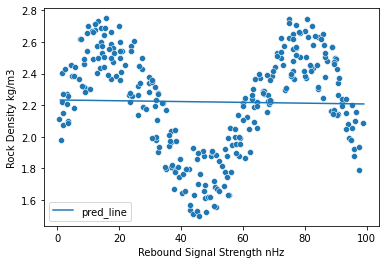

In [52]:
plt.figure()
sns.scatterplot(data=rock,x='Rebound Signal Strength nHz',y='Rock Density kg/m3')
plt.plot(single_range,pred_single,label ='pred_line')
plt.legend()
plt.show()

## #Polynomial-Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [98]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    r2_Score = r2_score(y_test,preds)
    print(f'RMSE : {rmse}')
    print(f'r2_Score:- {r2_Score}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Rebound Signal Strength nHz',y='Rock Density kg/m3',data=rock,color='black')
    plt.plot(signal_range,output)

In [99]:
poly = PolynomialFeatures(degree=3,include_bias=False)
lin_reg = LinearRegression()

## #Pipeline for Polyfeature

In [100]:
from sklearn.pipeline import make_pipeline

In [101]:
pipe = make_pipeline(poly,lin_reg)

RMSE : 0.2741956540569927
r2_Score:- 0.09322542367598818


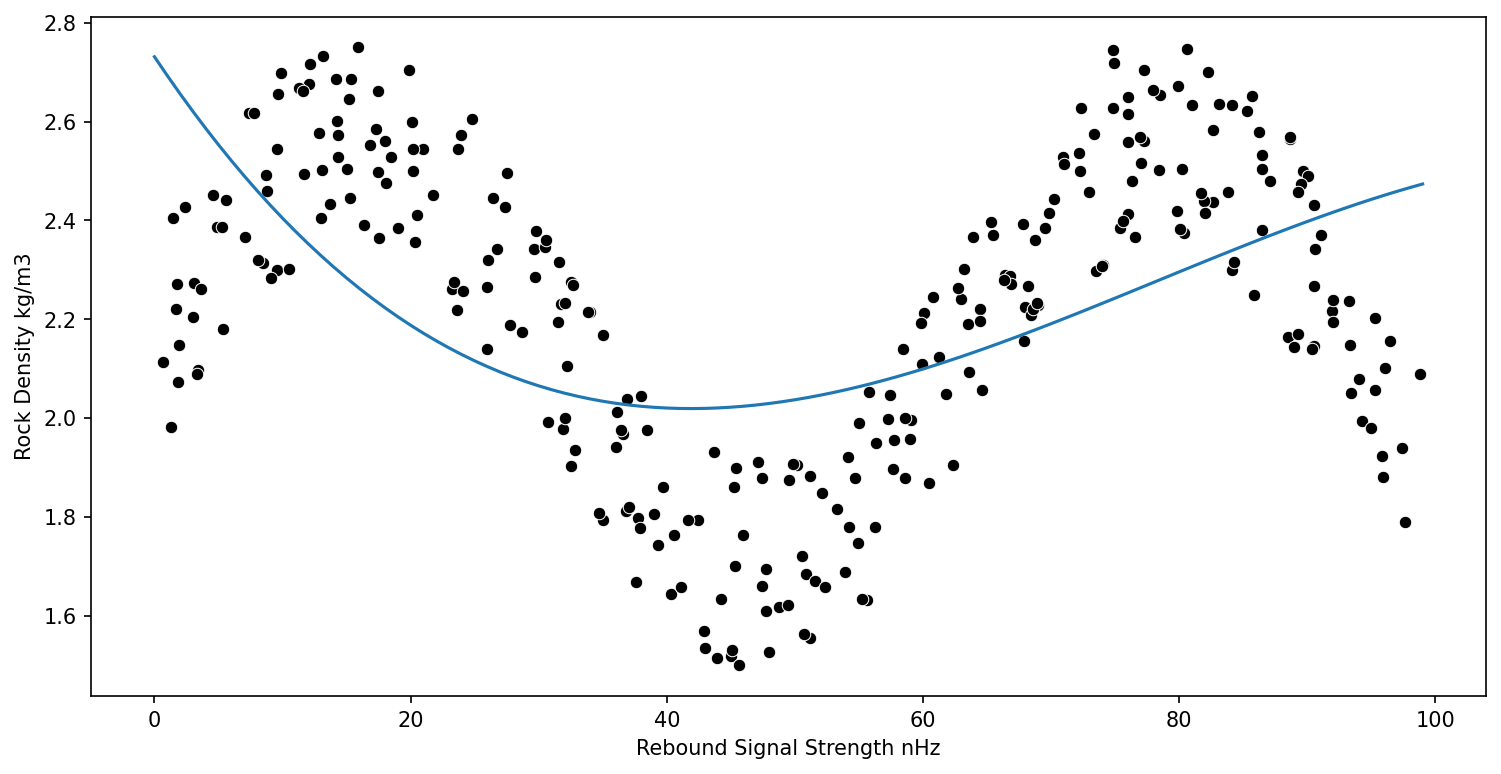

In [102]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [103]:
poly10 = PolynomialFeatures(degree=10,include_bias=False)
lin_reg = LinearRegression()

RMSE : 0.13562281418497094
r2_Score:- 0.7781580343961759


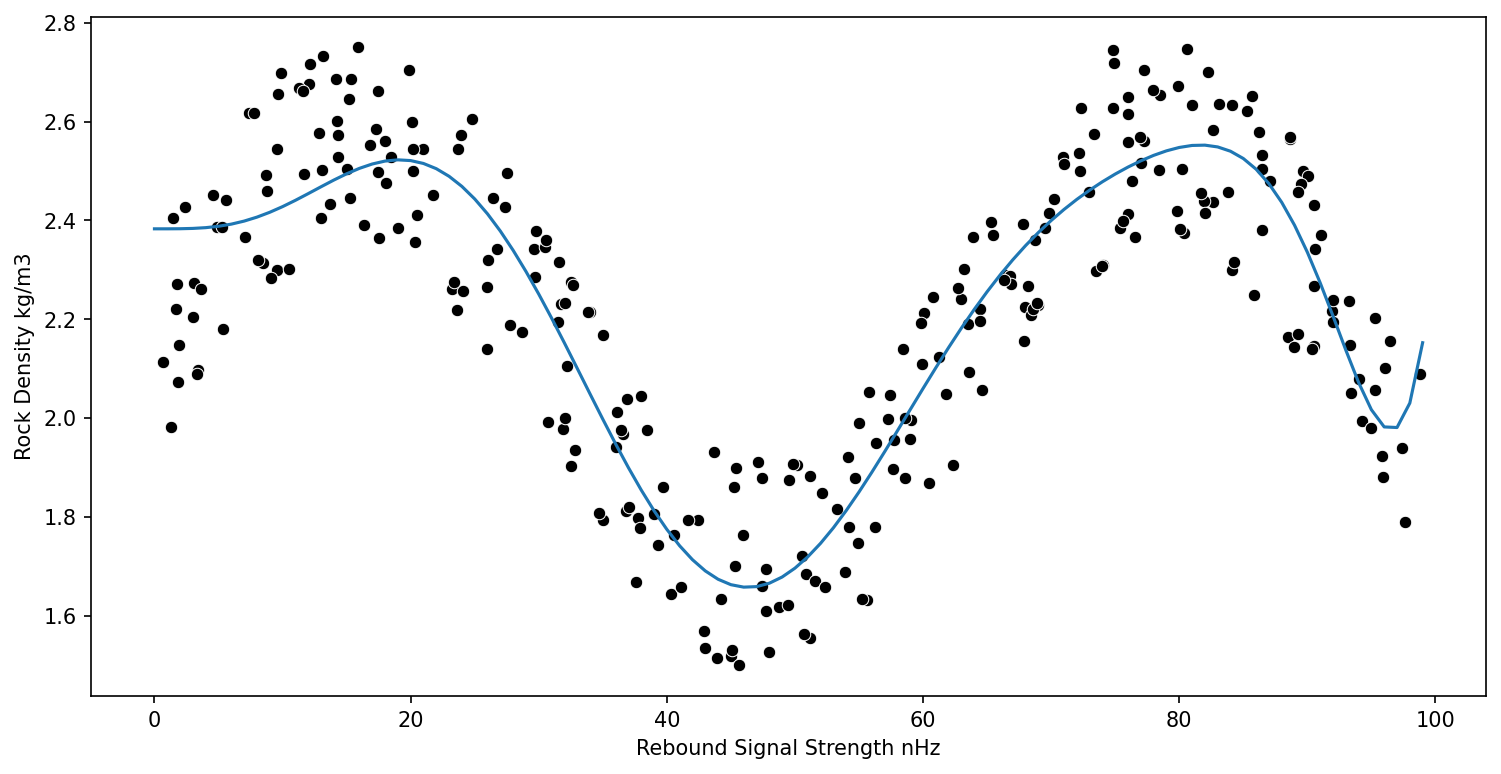

In [104]:
pipe1 = make_pipeline(poly10,lin_reg)
run_model(pipe1,X_train,y_train,X_test,y_test)

## #KNN-Regression

In [105]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3)

RMSE : 0.14431160079562932
r2_Score:- 0.7488225255248706


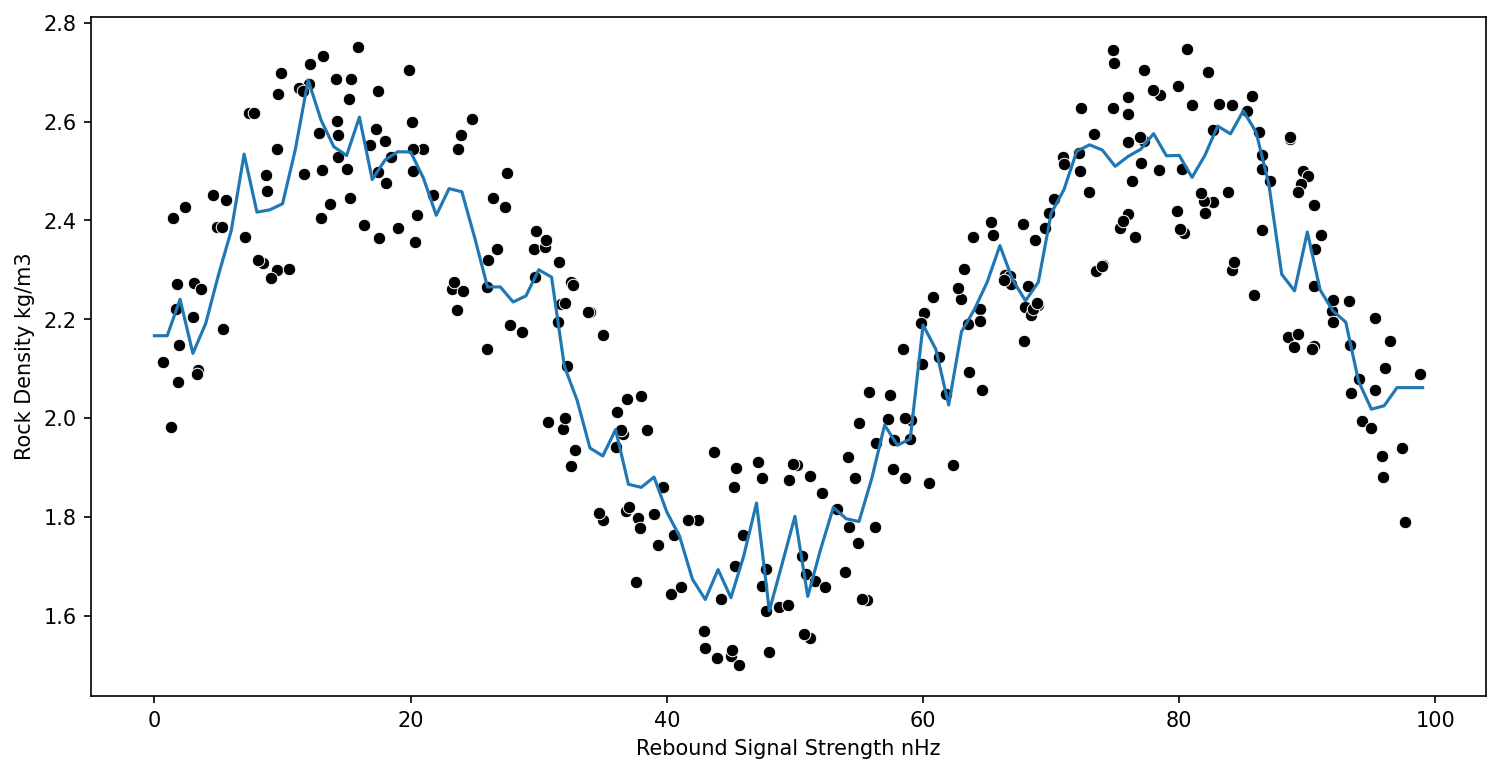

In [106]:
knn_pipe = make_pipeline(knn_reg)
run_model(knn_pipe,X_train,y_train,X_test,y_test)

## #Decision-Tree Regression

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
reg_tree = DecisionTreeRegressor(max_depth=3,max_features='auto',random_state=101)

RMSE : 0.1715670790271275
r2_Score:- 0.6449854801631241


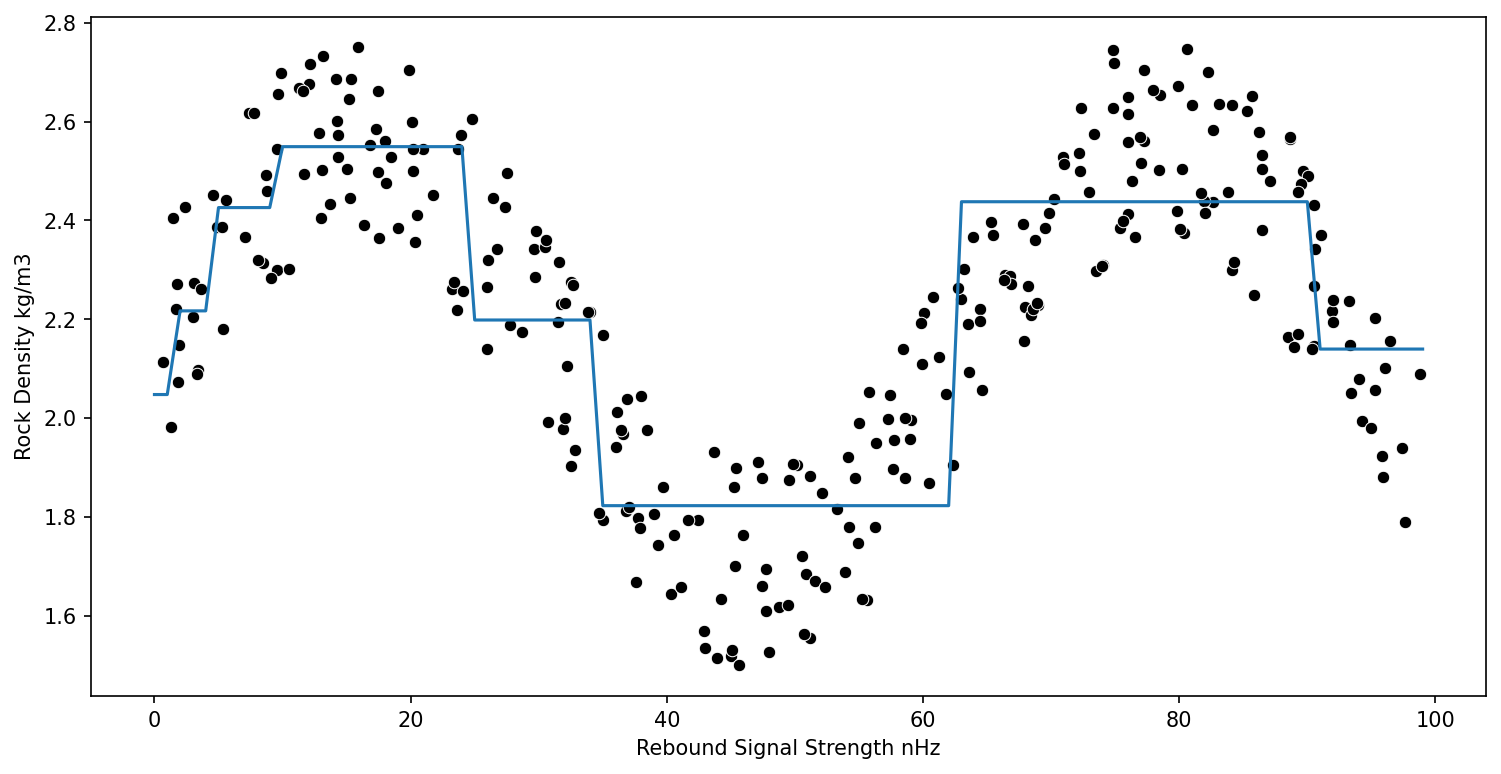

In [109]:
tree_pipe = make_pipeline(reg_tree)
run_model(tree_pipe,X_train,y_train,X_test,y_test)

## #Support-Vector Regression

In [110]:
from sklearn.svm import SVR

In [111]:
svr_reg = SVR(C=1.0,gamma='scale',kernel='rbf',max_iter=100)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSE : 0.13293787831900047
r2_Score:- 0.7868547359279683


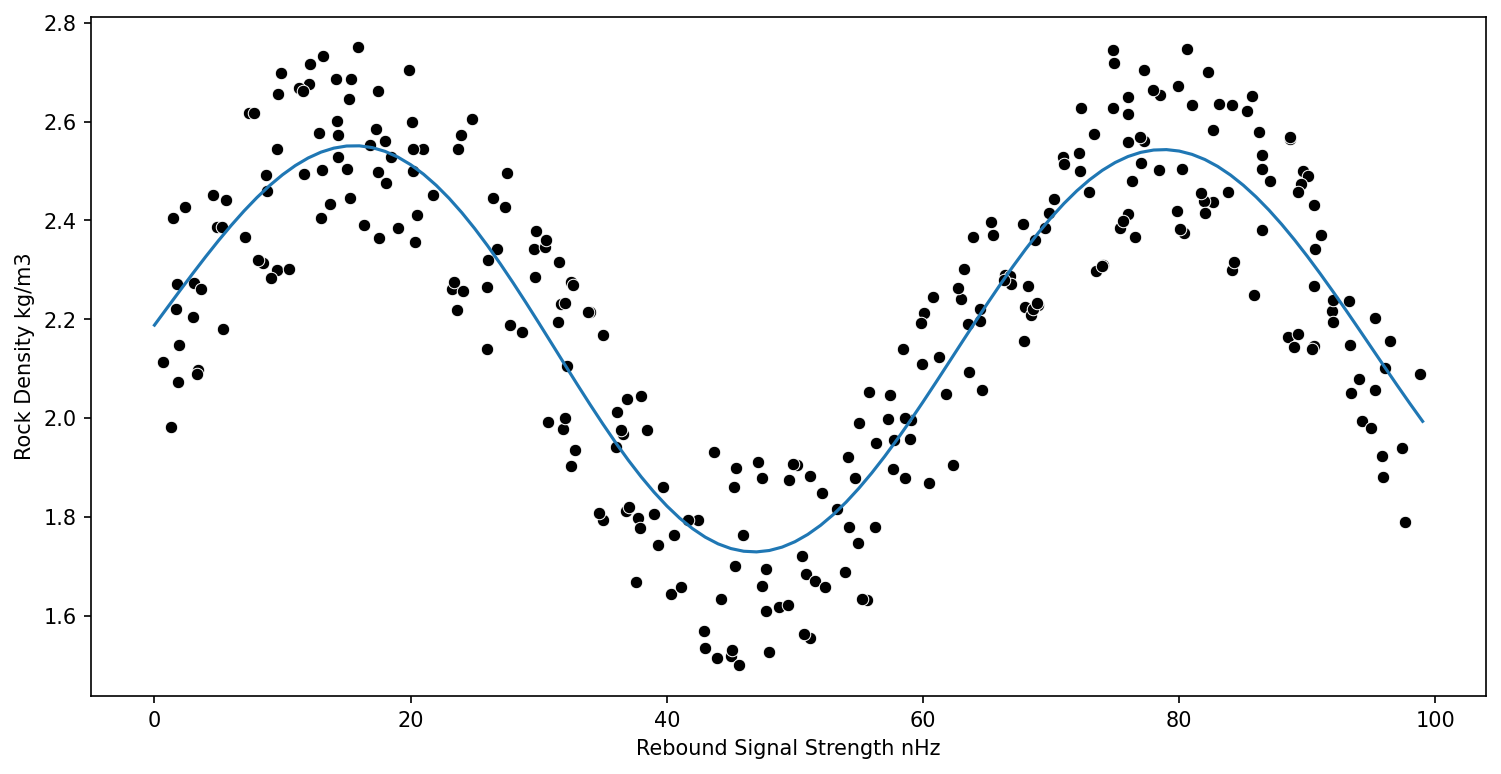

In [112]:
svr_pipe = make_pipeline(svr_reg)
run_model(svr_pipe,X_train,y_train,X_test,y_test)

In [113]:
## #Random-Forests Regression

In [114]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which i

RMSE : 0.14570376243487193
r2_Score:- 0.7439529750875739
RMSE : 0.1469395181828795
r2_Score:- 0.73959133930608
RMSE : 0.14626196083238724
r2_Score:- 0.7419873591956268
RMSE : 0.14633362640994835
r2_Score:- 0.7417344546831586


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


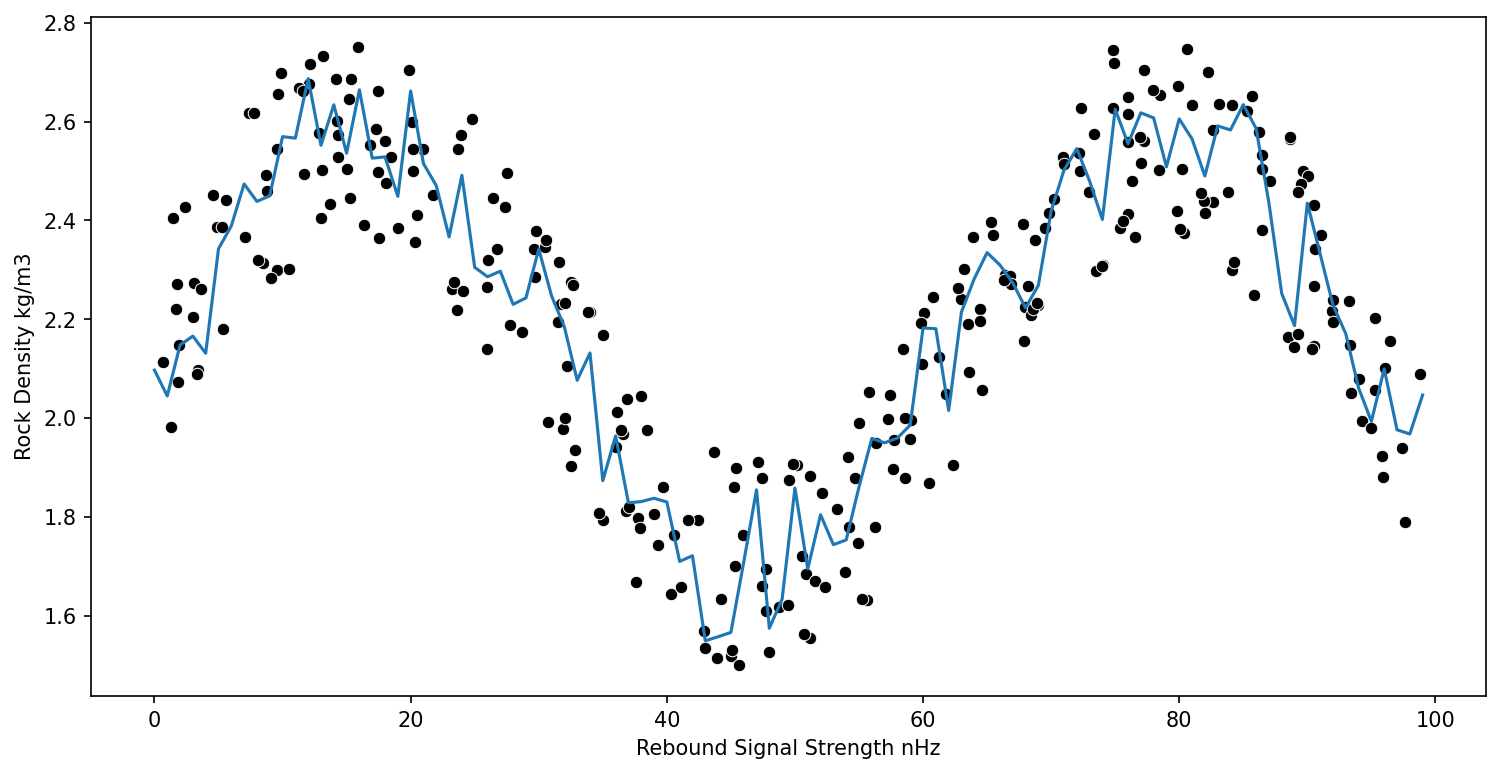

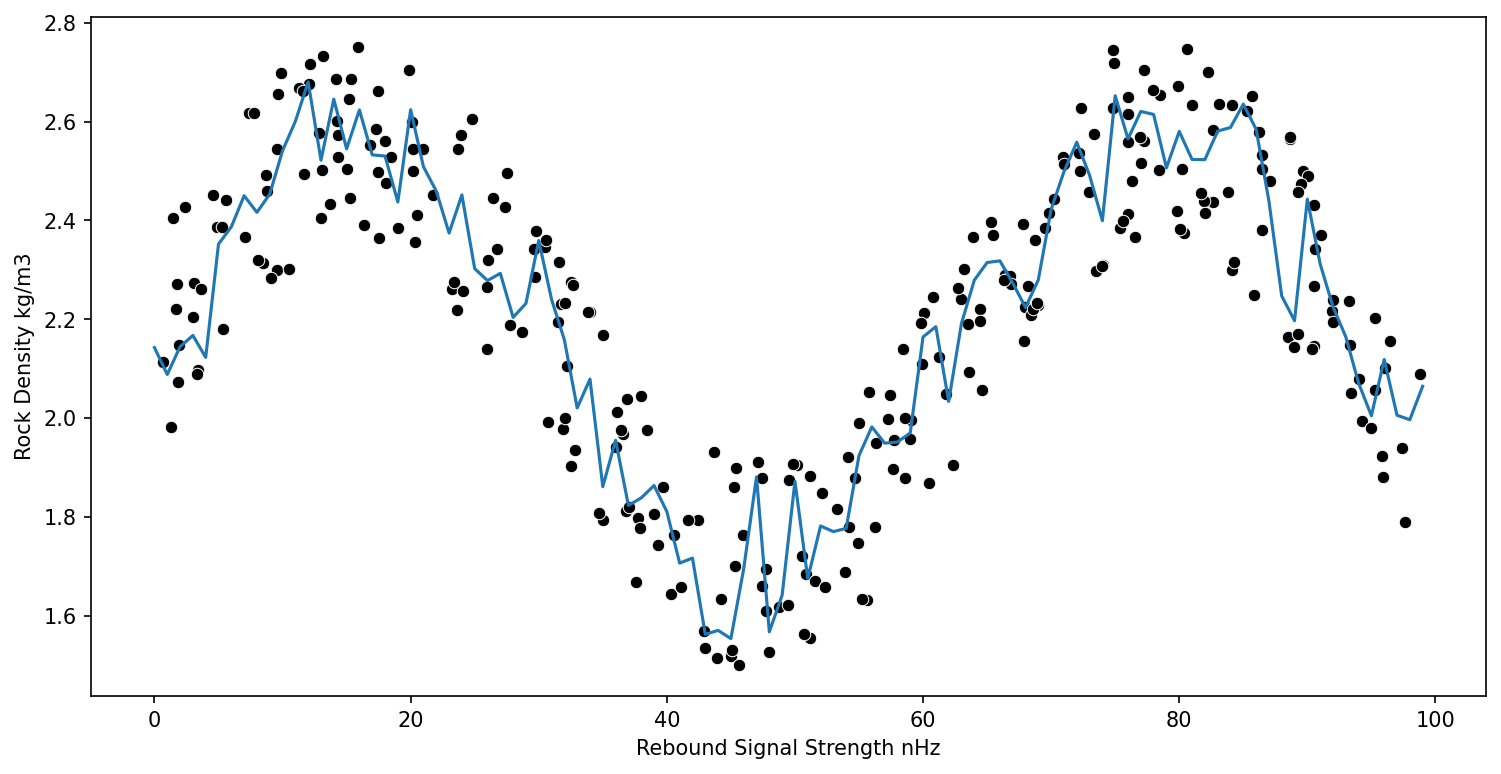

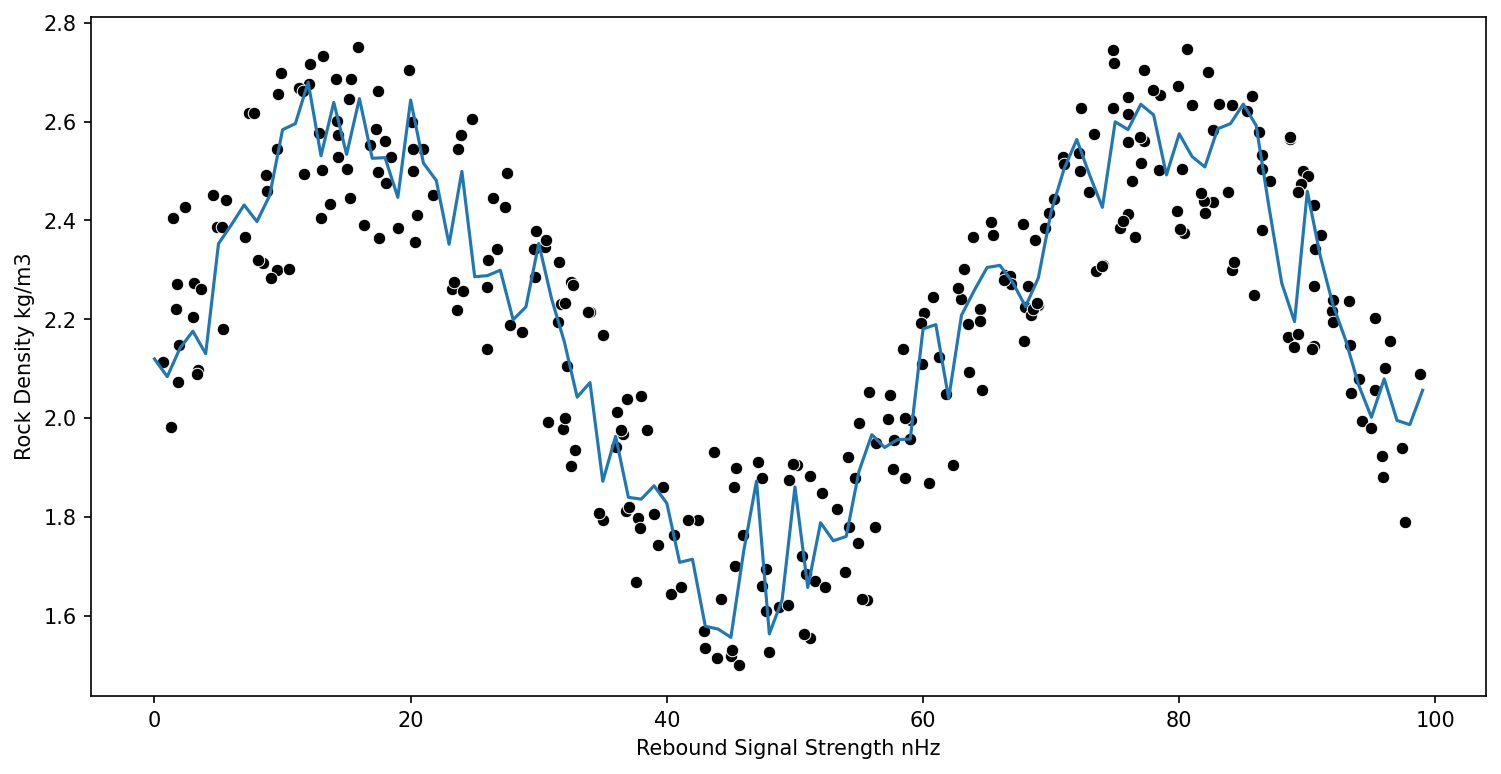

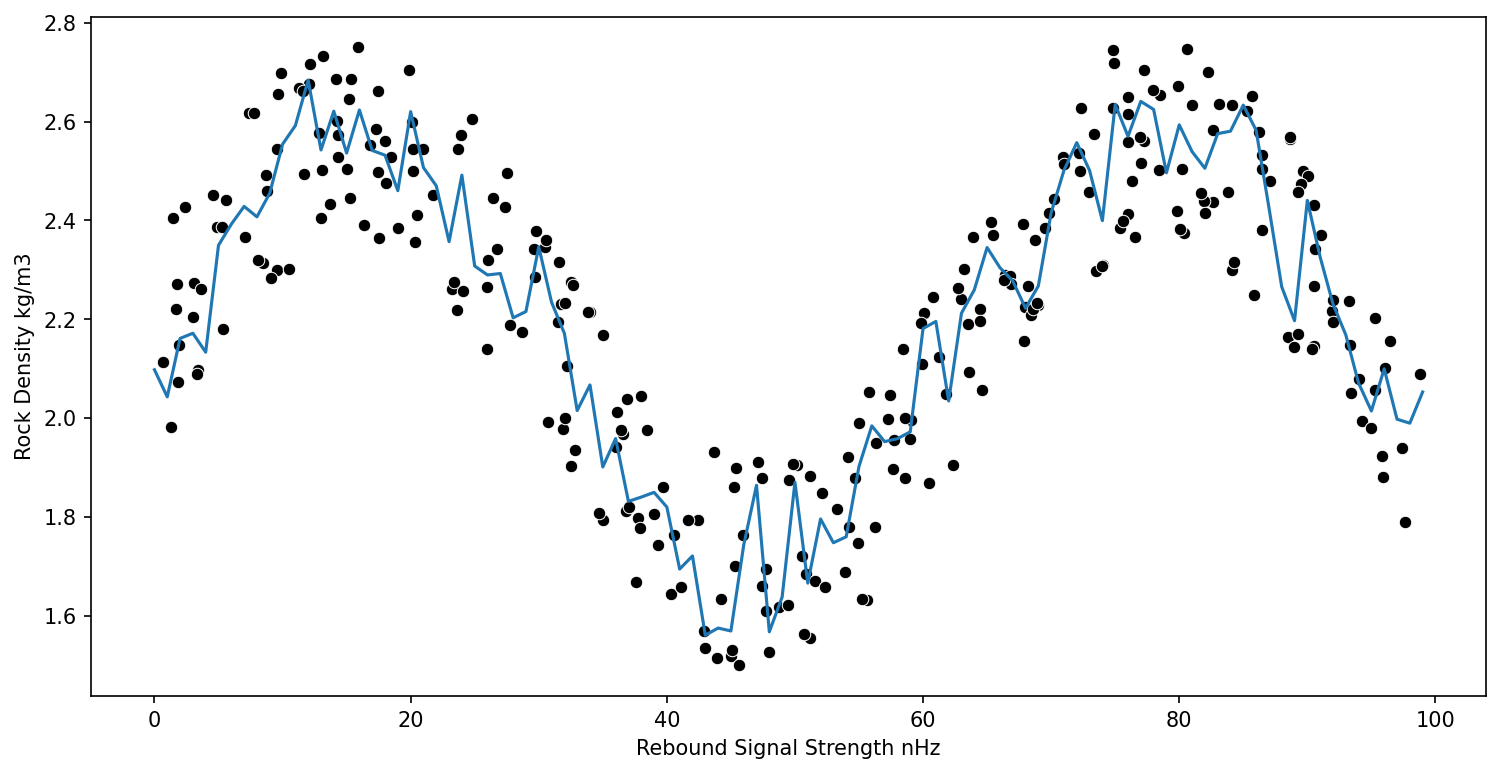

In [128]:
n_estimators = [40,60,80,100]
for n in n_estimators:
    randf_reg = RandomForestRegressor(n_estimators=n,criterion='mse',bootstrap=True)
    randf_pipe = make_pipeline(randf_reg)
    run_model(randf_pipe,X_train,y_train,X_test,y_test)

## #Gradient Boosting

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE : 0.1397753762329958
r2_Score:- 0.7643651399153247


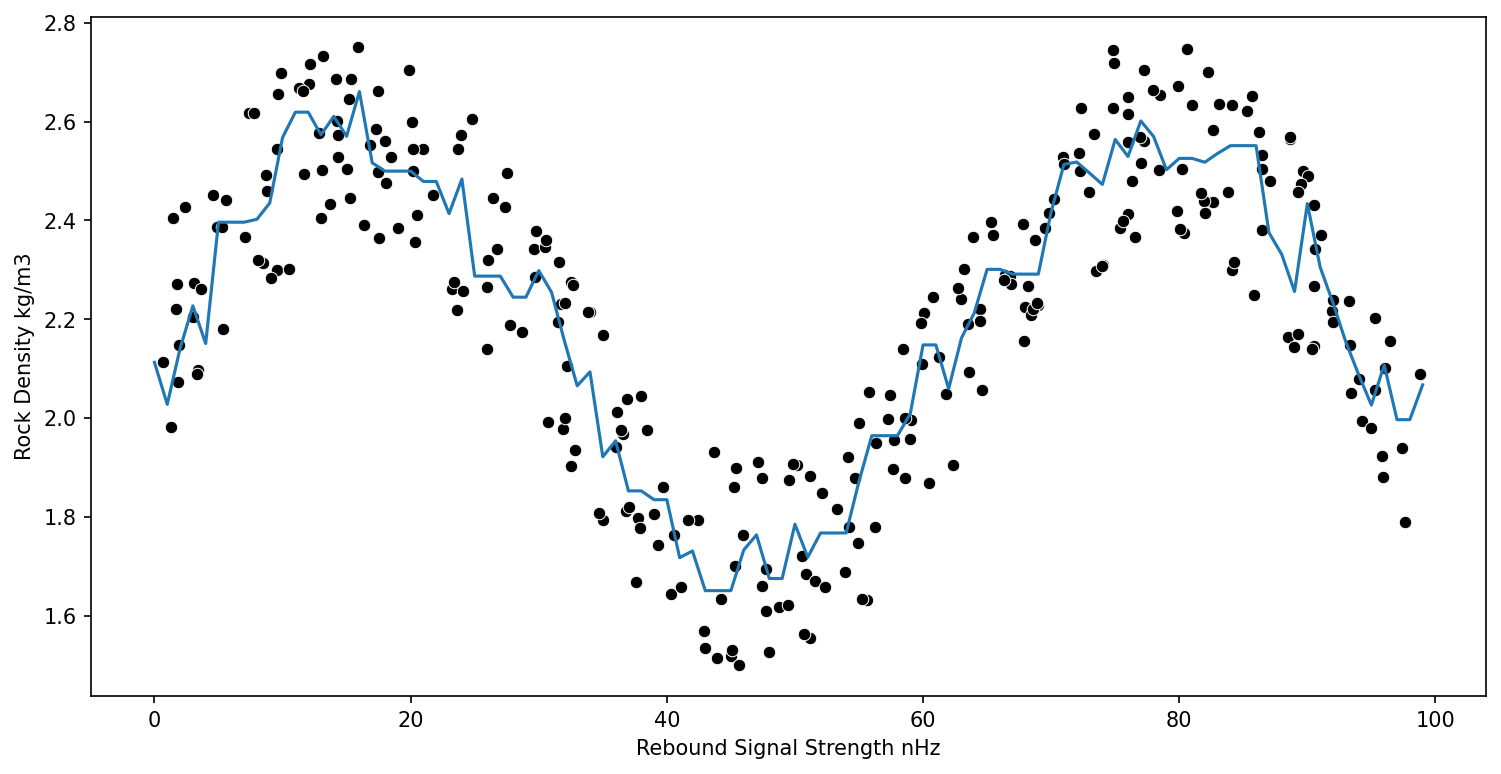

In [131]:
gradient = GradientBoostingRegressor()
run_model(gradient,X_train,y_train,X_test,y_test)    

In [ ]:
## # Adb Boosting

In [132]:
from sklearn.ensemble import AdaBoostRegressor

In [133]:
adb = AdaBoostRegressor()

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE : 0.13509894728407865
r2_Score:- 0.779868531439281


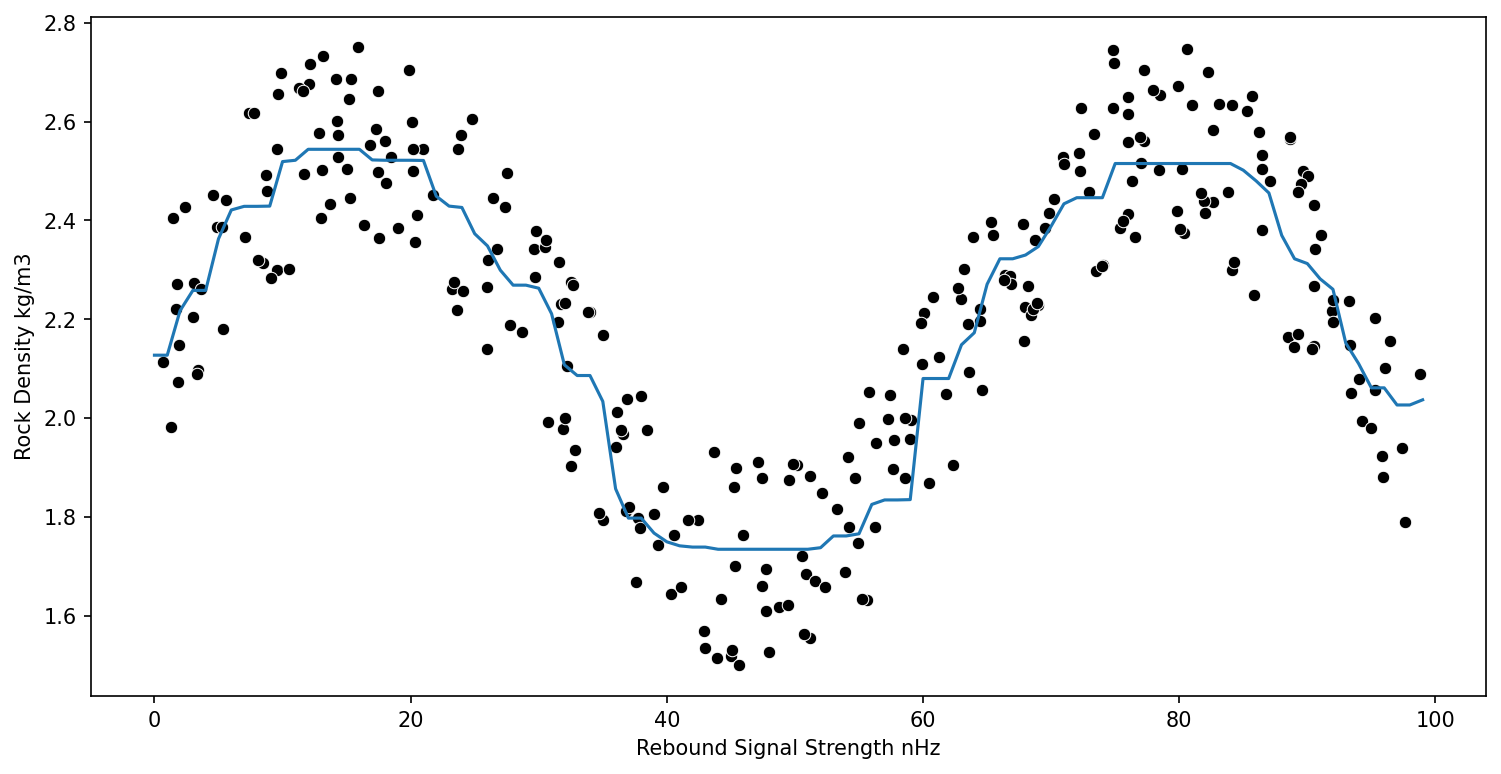

In [134]:
run_model(adb,X_train,y_train,X_test,y_test)

## #GridSearch for best parameters

In [122]:
# from sklearn.model_selection import GridSearchCV

In [124]:
# param_grid = {'n_estimators':[80,100,120,150,200],
#              'criterion':['mse','squared_error','poisson'],
#              'max_features':['auto','sqrt','log2'],
#              'bootstrap':['True','False'],
#              'oob_score':['True','False'],
#              'random_state':[42,101]}

In [125]:
# grid_model = GridSearchCV(randf_reg,param_grid=param_grid)

In [135]:
# randf_pipe = make_pipeline(grid_model)
# run_model(randf_pipe,X_train,y_train,X_test,y_test)